# Introducción a la Programación en Julia 
## Notebook 2

Mauricio Tejada

ILADES - Universidad Alberto Hurtado

## 2. Primeros Pasos en Julia

**Julia** es un lenguaje de programación dinámico de alto nivel y altamente eficiente diseñado para realizar análisis numérico. Julia fue creado para eliminar el problema del *doble lenguaje*. 

Los lenguajes de programación se categorizan en lenguajes de *alto nivel* y lenguajes de *bajo nivel*.

> Un lenguaje de *programación de alto nivel* se caracteriza por expresar el algoritmo de una manera adecuada a la capacidad cognitiva humana, en lugar de la capacidad ejecutora de las máquinas. 
>
>Un lenguaje de *programación de bajo nivel* es aquel en el que sus instrucciones ejercen un control directo sobre el hardware y están condicionados por la estructura física de las computadoras que lo soportan. 
>
>El uso de la palabra bajo nivel no implica que el lenguaje sea menos potente que un lenguaje de alto nivel, sino que se refiere a la reducida abstracción entre el lenguaje y el hardware 
>
>*Wikipedia*

Los lenguajes de alto nivel (como Matlab, R, Python, etc) buscan minimizar el tiempo de programación pero son ineficientes en lo que se refiere al tiempo de ejecución. Los lenguajes de bajo nivel (como C, C++, Fortran, etc), por el contrario, requieren más tiempo y esfuerzo al programar pero son bastante eficientes en la ejecución.  

El problema del doble lenguaje surge en dos situaciones:

1. Realizar el prototipo de programa en un lenguaje de alto nivel y luego re-programar en un lenguaje de bajo nivel para obtener mayor velocidad en ejecución.
2. Muchos lenguajes de alto nivel (incluidos Matlab, Python y R) tienen dos capas: lenguaje de alto nivel en la interacción con el usuario que llama a programas en lenguaje de bajo nivel para que se ejecuten detrás de bambalinas.


### 2.1 Instalar e Interactuar con Julia

- Bajar Julia de la página oficial: https://julialang.org/downloads/. Elegir la versión según el sistema operativo. Es recomendable bajar la versión LTS (soporte de largo plazo): actualmente v1.0.5.
- Vamos a usar un *entorno de desarrollo integrado (IDE)* para trabajar con Julia. Tenemos varias opciones:
     - Atom + Juno: Bajar Atom (https://atom.io/) e intalar JUNO (Configuración + Intalar Paquetes).
     - Visula Studio Code + Julia: Bajar VSCode (https://code.visualstudio.com/) e instalar la extensión Julia. *Este es el IDE que actualmente estoy usando*.
     - Jupyter notebooks. Instalar paquete IJulia en Julia (más adelante)

Una alternativa para bajar Julia en un empaquetado de Julia+JUNO+Jupyter es instalar JuliaPRO. La versión básica es gratuita y sólo requiere registro de usuario. Se puede descargar JuliaPRO del siguiente link: https://juliacomputing.com/products/juliapro.html

Julia usa el espacio de un directorio como área de trabajo. Dicho directorio se denomina *directorio de trabajo* y todos los archivos (que no formen parte del paquete) deber estar en dicho directorio (por ejemplo, datos, procedimientos adicionales, etc).

* Usar `pwd()` para conocer el directorio de trabajo actual.
* Usar `cd("directorio")` para cambiar el directorio de trabajo.

In [1]:
pwd()

"/Users/mauriciotejada/Dropbox/Teaching/MAE - Julia/2020/slides"

In [2]:
cd("/Users/mauriciotejada/Dropbox/")
pwd()

"/Users/mauriciotejada/Dropbox"

In [3]:
cd("/Users/mauriciotejada/Dropbox/Teaching/MAE - Julia/2020/slides");

Note: Los usuarios de Windows deben usar las rutas en formato `C:\Dir\Subdir\`

### 2.2 Ayuda

Más allá de este curso introductorio, la mejor forma de aprender Julia es a través de la experimentación. Las dos fuentes más importantes para referencia: 
1. Documentación de Julia: https://docs.julialang.org/en/v1/. En la parte de abajo (a la izquierda) es posible seleccionar la versión de Julia.
2. Google (existen literalmente millones de códigos en la web que resuelven distintos problemas).

Para acceder a la documentación de Julia usar `?` y el curso cambiará a `help?>`. Por ejemplo, se puede buscar ayuda sobre un comando o procedimiento en particular usando `? comando`

In [4]:
? println

search: println printstyled print sprint isprint



```
println([io::IO], xs...)
```

Print (using [`print`](@ref)) `xs` followed by a newline. If `io` is not supplied, prints to [`stdout`](@ref).

# Examples

```jldoctest
julia> println("Hello, world")
Hello, world

julia> io = IOBuffer();

julia> println(io, "Hello, world")

julia> String(take!(io))
"Hello, world\n"
```


### 2.3 Paquetes

Es posible aumentar las capacidades de Julia usando paquetes (ya sea con los que vienen en la instalación base como con externos). Los paquetes son invocados (después de haber sido instalados) usando la sintaxis: `using nombre_paquete`. Para administrar los paquetes en julia se usa el *paquete* `Pkg`. La sintaxis para instalar un paquete es: 

```julia
using Pkg
Pkg.add("nombre_paquete")
```

**Nota:** El computador debe estar conectado a Internet para descargar los archivos binarios del paquete a instalar. Los archivos descargados son guardados en la carpeta: `~/.julia/environments/`.

Cada paquete por defecto instala todas las dependencias necesarias para funcionar (esto es, otros paquetes necesarios).

Adicionalmente, los siguientes comandos son útiles:

- `Pkg.rm("nombre_paquete")`: Elimina un paquete.
- `Pkg.build("nombre_paquete")`: Reconstruye un paquete desde sus archivos binarios.
- `Pkg.status()`: Provee una lista de los paquetes instalados.
- `Pkg.update()`: Actualiza los paquetes instalados.

Los paquetes y sus versiones utilizados en este curso son:

In [5]:
using Pkg
Pkg.status()

Status `~/.julia/environments/v1.4/Project.toml`
  [28f2ccd6] ApproxFun v0.11.14
  [e28b5b4c] Bootstrap v2.2.0
  [336ed68f] CSV v0.6.2
  [49dc2e85] Calculus v0.5.1
  [8f4d0f93] Conda v1.4.1
  [667455a9] Cubature v1.5.1
  [a93c6f00] DataFrames v0.21.2
  [31c24e10] Distributions v0.23.4
  [c04bee98] ExcelReaders v0.11.0
  [f6369f11] ForwardDiff v0.10.10
  [38e38edf] GLM v1.3.9
  [60bf3e95] GLPK v0.13.0
  [7073ff75] IJulia v1.21.2
  [a98d9a8b] Interpolations v0.12.10
  [b6b21f68] Ipopt v0.6.2
  [4138dd39] JLD v0.10.0
  [4076af6c] JuMP v0.21.2
  [857edff2] KernelEstimator v0.3.3
  [b964fa9f] LaTeXStrings v1.1.0
  [98b081ad] Literate v2.5.0
  [6f286f6a] MultivariateStats v0.7.0
  [2774e3e8] NLsolve v4.4.0
  [90c472d1] OOPMacro v0.4.0
  [429524aa] Optim v0.21.0
  [91a5bcdd] Plots v1.4.0
  [c3e4b0f8] Pluto v0.9.9
  [438e738f] PyCall v1.91.4
  [d330b81b] PyPlot v2.9.0
  [1fd47b50] QuadGK v2.3.1
  [fcd29c91] QuantEcon v0.16.2
  [295af30f] Revise v2.7.3
  [f2b01f46] Roots v1.0.2
  [2913bbd2] Sta

### 2.4 Comentarios

Comentar o dejar documentación en diferentes partes de un código es muy útil para explicar en detalle que es exactamente qué cálculos se están realizando. Esto es particularmente útil cuando el código es compartido con otra persona o con uno mismo en el futuro. 

- Comentarios de una sola línea inician con `#`. Todo lo que precede a este símbolo será ignorado por Julia.
- Comentarios de más de una línea inician con `#=` y cierran con `=#`. Estos comentarios son útiles para escribir documentación de detallada que requiera de varias líneas.

### 2.5 Variables

Julia es un lenguaje basado en expresiones. 

Las expresiones que introducimos mediante el teclado son interpretadas y evaluadas. 

Cada expresión genera algún tipo de *output* que puede ser asignado en una *variable*. La asignación se realiza de la siguiente forma:

```
nombrevariable = expresión
```

Si se introduce alguna expresión pero no se define un nombre para la variable, Julia asigna la expresión a una variable auxiliar temporal denominada `ans`.

Todas las variables son almacenadas en la memoria RAM del computador por lo que se pierden en cuanto uno sale y apaga  Julia.

Algunas reglas al elegir los nombres de las variables:

- Los nombres deben empezar con una letra y pueden contener letras, números y `_`.
- Julia es sensible a mayúsculas y minúsculas (`x` es diferente de `X`).
- Julia soporta el sistema unicode para nombrar variables. Por ejemplo, es posible llamar una variable `\alpha<TAB> = 0.3` (recuerde presionar la tecla TAB antes de escribir el signo igual).

Tipos básicos de variables:

1. Numéricas (distinguiendo entre enteros (`Int64`), decimales (`Float64`) y complejos (`Complex`)):

In [6]:
x = 2.5
typeof(x) # función que muestra el tipo de la variable

Float64

In [7]:
y = 4
typeof(y)

Int64

In [8]:
variable_imaginaria = 2.0 + 5.0im
typeof(variable_imaginaria)

Complex{Float64}

In [9]:
α = 0.4
typeof(α)

Float64

2. Texto (se asignan usando `""` o `""" """`):

In [10]:
Y_1 = "Texto"
typeof(Y_1)

String

In [11]:
var_texto = "Pueden incluirse Espacios"

"Pueden incluirse Espacios"

In [12]:
var_texto_muy_largo = """
Esto es un texto muy largo incluido en una
variable. El texto tiene varias lineas.
"""

"Esto es un texto muy largo incluido en una\nvariable. El texto tiene varias lineas.\n"

3. Booleanos (variables dicotómicas o que sólo admiten dos valores: verdadero (`true`) o falso (`false`).)

In [13]:
var_bool = true
typeof(var_bool)

Bool

4. Carácter (el valor de una constante de tipo carácter es el valor numérico de ese carácter en el código ASCII):

In [14]:
var_car = 'a'
typeof(var_car)

Char

Para saber qué objetos se han creado se usan los comandos `varinfo()`. Esta función muestra los nombres de todas las variables y da información detallada del tipo y el tamaño.

In [15]:
varinfo()

| name                |     size | summary          |
|:------------------- | --------:|:---------------- |
| Base                |          | Module           |
| Core                |          | Module           |
| Main                |          | Module           |
| Y_1                 | 13 bytes | String           |
| var_bool            |   1 byte | Bool             |
| var_car             |  4 bytes | Char             |
| var_texto           | 33 bytes | String           |
| var_texto_muy_largo | 91 bytes | String           |
| variable_imaginaria | 16 bytes | Complex{Float64} |
| x                   |  8 bytes | Float64          |
| y                   |  8 bytes | Int64            |
| α                   |  8 bytes | Float64          |


### 2.6 Operaciones Matemáticas Básicas

Julia tiene todas las operaciones matemáticas básicas:

1. Suma (`+`)
2. Resta (`-`)
3. Multiplicación (`*`)
4. División (`/`)
5. Potencia (`^`)
6. Módulo (`%`)

In [16]:
x = 2.4
y = 5
z_sum = x + y

7.4

In [17]:
typeof(z_sum)

Float64

In [18]:
z_pro = x*y

12.0

In [19]:
z_pot = x^y

79.62623999999998

In [20]:
x = 5
y = 2
z_mod = y % x

2

La operación multiplicación `*` esta definida también cuando las variables son tipo texto y sirve para concatenar variables:

In [21]:
a = "hola amigo "
b = "Jon Snow"
z = a * b

"hola amigo Jon Snow"

### 2.7 Estructura de Datos

En el trabajo diario con variables es útil poder almacenarlas conjuntamente en ciertas estructuras de datos y trabajar con todas ellas al mismo tiempo que usarlas todas de manera dispersa. Los tipos de estructuras de datos básicos son:

1. Tuplas (Tuples)
2. Diccionarios (Dictionaries)
3. Arreglos (Arrays)

Algunos comentarios:

- Las Tuplas y los Arreglos son secuencias ordenadas de elemento y por tanto es posible utilizar índices para describir sus elementos. Los Diccionarios, en tanto, asocian a cada elemento una clave. 
- Los Diccionarios y los Arreglos son mutables (podemos cambiar sus elementos), en tanto que las Tuplas no lo son.
- Las tres estructuras de datos pueden contener una mezcla de tipos de variables, por ejemplo almacenando tanto valores numéricos con de tipo texto.


1. Las **Tuplas** se crean utilizando el siguiente sintaxis: `nombre = (item1, item2, ...)`

In [22]:
xtup = (1, 2, 3, "texto")

(1, 2, 3, "texto")

Cada elemento puede ser recuperado usando el índice asociado a su ordenamiento (empezando en 1) bajo el sintaxis `nombre_var[indice]`:

In [23]:
xtup[4]

"texto"

Como las Tuplas son inmutables, no se puede cambiar el contenido de ellas una vez que ya se crearon.

In [24]:
xtup[2] = 8

MethodError: MethodError: no method matching setindex!(::Tuple{Int64,Int64,Int64,String}, ::Int64, ::Int64)

2. Los **Diccionarios** se crean utilizando la siguiente sintaxis: `Dict(clave1 => valor1, clave2 => valor2, ...)`

In [25]:
notas = Dict("Javier" => 6.5, "Camila" => 6.8, "Ernesto" => "No Rindio el Examen")

Dict{String,Any} with 3 entries:
  "Ernesto" => "No Rindio el Examen"
  "Camila"  => 6.8
  "Javier"  => 6.5

Cada elemento puede ser recuperado usando su clave asociada bajo el sintaxis `nombre_dic["clave"]`:

In [26]:
notas["Camila"]

6.8

Los Diccionarios son mutable por lo que podemos cambiar su contenido:

In [27]:
notas["Ernesto"] = 7.0

7.0

In [28]:
notas

Dict{String,Any} with 3 entries:
  "Ernesto" => 7.0
  "Camila"  => 6.8
  "Javier"  => 6.5

Es posible además adicionar elementos definiendo una clave inexistente y su valor:

In [29]:
notas["Paola"] = 6.5

6.5

In [30]:
notas

Dict{String,Any} with 4 entries:
  "Ernesto" => 7.0
  "Paola"   => 6.5
  "Camila"  => 6.8
  "Javier"  => 6.5

Para eliminar una entrada del Diccionario usamos la función `pop!(Diccionario, "clave")`

In [31]:
pop!(notas, "Javier")

6.5

In [32]:
notas

Dict{String,Any} with 3 entries:
  "Ernesto" => 7.0
  "Paola"   => 6.5
  "Camila"  => 6.8

3. Los **Arreglos** se crean utilizando el siguiente sintaxis: `nombre = [item1, item2, ...]`

In [33]:
lista_nombres = ["Javier", "Camila", "Ernesto", "Paola"]

4-element Array{String,1}:
 "Javier"
 "Camila"
 "Ernesto"
 "Paola"

In [34]:
secuencia_numeros = [3.8, 4.0, 2.5, 6.8, 9.0]

5-element Array{Float64,1}:
 3.8
 4.0
 2.5
 6.8
 9.0

In [35]:
arreglo_mexclado = [3.8, 4.0, 2.5, 6.8, "texto"]

5-element Array{Any,1}:
 3.8
 4.0
 2.5
 6.8
  "texto"

Al igual que con las Tuplas, cada elemento puede ser recuperado usando el índice asociado a su ordenamiento (empezando en 1) bajo el sintaxis `nombre_arreglo[indice]`: 

In [36]:
secuencia_numeros[4]

6.8

Los Arreglos son mutable por lo que podemos cambiar su contenido:

In [37]:
secuencia_numeros[4] = 4.0

4.0

In [38]:
secuencia_numeros

5-element Array{Float64,1}:
 3.8
 4.0
 2.5
 4.0
 9.0

Es posible editar el contenidos de un Arreglo usando las funciones `push!` y `pop!`.

- `push!` adiciona un elemento al final del arreglo.
- `pop!` remueve el último elemento del arreglo.

In [39]:
fibonacci = [1, 1, 2, 3, 5, 8, 13]

7-element Array{Int64,1}:
  1
  1
  2
  3
  5
  8
 13

In [40]:
push!(fibonacci, 21)

8-element Array{Int64,1}:
  1
  1
  2
  3
  5
  8
 13
 21

In [41]:
pop!(fibonacci)

21

In [42]:
fibonacci

7-element Array{Int64,1}:
  1
  1
  2
  3
  5
  8
 13

Como los arreglos (y también las Tuplas y los Diccionarios) almacenan información, es posible construir Arreglos que contengan otros Arreglos:

In [43]:
arreglos_compuestos = [[3, 4, 1], [2, 1], 3, [6, 7, 8, 9, 11]]

4-element Array{Any,1}:
  [3, 4, 1]
  [2, 1]
 3
  [6, 7, 8, 9, 11]

Finalmente, se pueden crear Arreglos vacíos con el objetivo es reservar espacio en la memoria.

In [44]:
arrogle_vacio = []

0-element Array{Any,1}

**Nota:** Julia trata de optimizar el espacio usado en memoria no duplicando por defecto elementos. Así, si uno asigna un elemento a otro nombre usando `=` no está creando una copia sino una máscara para el mismo elemento. Esto es importante, porque si uno cambia el segundo elemento creado este cambio se reflejará también en el primer elemento. Por ejemplo:

In [45]:
x = [3, 4, 5]

3-element Array{Int64,1}:
 3
 4
 5

In [46]:
y = x

3-element Array{Int64,1}:
 3
 4
 5

In [47]:
y[3] = 100

100

In [48]:
x

3-element Array{Int64,1}:
   3
   4
 100

Para evitar esto se usa la función `copy()` (para estructuras más complejas se usa `deepcopy()`, copia además elementos dentro elementos como Arreglos dentro Arreglos).

In [49]:
z = copy(x)

3-element Array{Int64,1}:
   3
   4
 100

In [50]:
z[3] = 1000

1000

In [51]:
x

3-element Array{Int64,1}:
   3
   4
 100

### 2.8 Imprimir Resultados en Pantalla

Para mostrar el valor de las variables en pantalla usamos `println()` (imprime el contenido en pantalla y deja el cursor en la siguiente línea). Algunos ejemplos:

In [52]:
NombreLargo = 4.5
println(NombreLargo)
println(Y_1);
println("*** Otra forma ***") # Note que esta es una variable de texto definida directamente para 
println("---------")                              

4.5
Texto
*** Otra forma ***
---------


Es posible extrapolar valores dentro una variable de texto usando `"$var"`. Por ejemplo:


In [53]:
x = 2
y = "$x es par"

"2 es par"

Esta idea se puede usar en combinación con la función `println()` para mostrar resultados en pantalla.

In [54]:
prof_name = "Mauricio Tejada"
prof_of = 211
prof_email = "matejada@uahurtado.cl"

println("Mi nombre es $prof_name") 
println("Mi oficina es la $prof_of y mi email es $prof_email")

Mi nombre es Mauricio Tejada
Mi oficina es la 211 y mi email es matejada@uahurtado.cl


### 2.9 Elementos Básicos para Graficar

In [55]:
using Plots

Ejemplo 1:

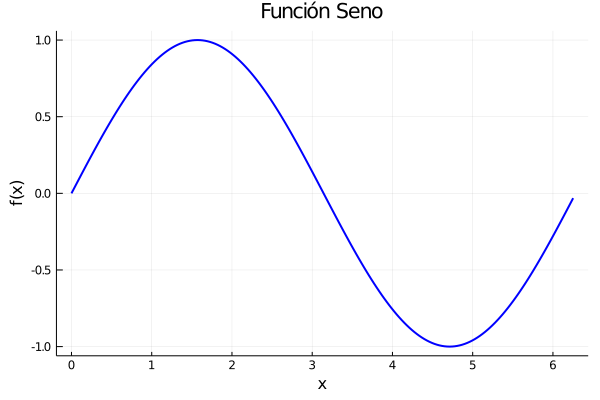

In [56]:
x = collect(0:pi/100:2*pi)
y = sin.(x)

plt_sin = plot(x,y, xlabel="x", ylabel="f(x)", title = "Función Seno", 
               color="blue", legend=false, linewidth = 2, grid = true)
display(plt_sin)

Ejemplo 2:

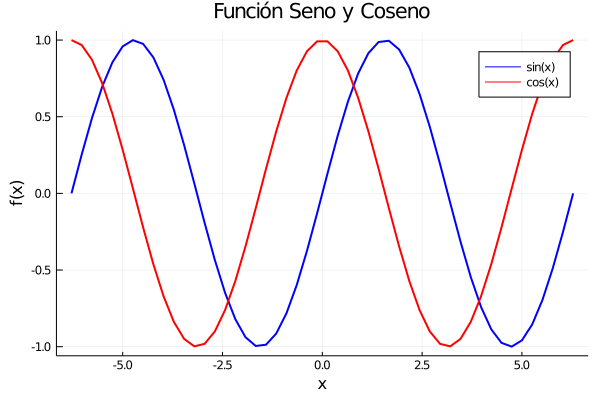

In [57]:
x = range(-2*pi, stop = 2*pi, length = 50)
y1 = sin.(x)
y2 = cos.(x)

plt_sincos = plot(x,[y1 y2], xlabel="x", ylabel="f(x)", title = "Función Seno y Coseno", 
                  color=["blue" "red"], label=["sin(x)" "cos(x)"], legend = true, 
                  linewidth = 2, grid = true)
display(plt_sincos)

Existen muchas opciones para personalizar un gráfico:

Estilos (usamos la opción `line`):
- `:solid` Línea sólida (por defecto)
- `:dash` Línea cortada.
- `:dot` Línea punteada.
- `:dashdot` Línea cortada-puntada.

Colores (usamos la opción `color`):
- `:yellow` Amarillo.
- `:red` Rojo.
- `:green` Verde.
- `:blue` Azul.
- `:white` Blanco.
- `:black` Negro.

Marcadores principales (usamos la opción `shape`):
- `:circle`
- `:square`
- `:diamond`
- `:hexagon`
- `:cross`
- `:pentagon`
- `:vline`
- `:hline`
- `:+`
- `:x`

Para un listado completo de las opciones para personalizar gráficos ver el manual de `Plots` en http://docs.juliaplots.org/latest/

Ejemplo 3:

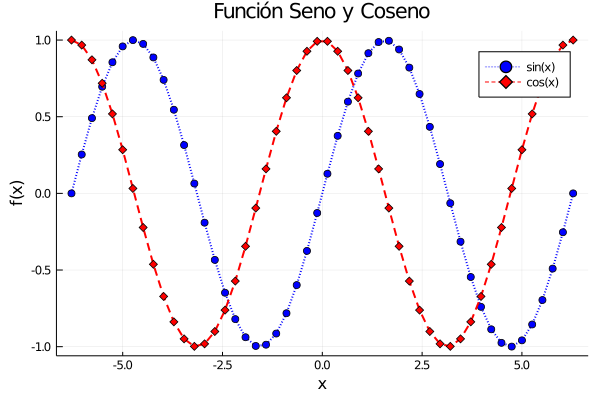

In [58]:
x = range(-2*pi, stop = 2*pi, length = 50)
y1 = sin.(x)
y2 = cos.(x)

plt_sincos = plot(x,[y1 y2], xlabel="x", ylabel="f(x)", title = "Función Seno y Coseno", 
                  color=[:blue :red], label=["sin(x)" "cos(x)"], legend = true, 
                  linewidth = 2, shape = [:circle :diamond], line = [:dot :dash],
                  grid = true)
display(plt_sincos)

Usamos la función `savefig` para exportar un gráfico a un archivo, por ejemplo, `pdf`. 

In [59]:
?savefig

search: savefig StackOverflowError



```
savefig([plot,] filename)
```

Save a Plot (the current plot if `plot` is not passed) to file. The file type is inferred from the file extension. All backends support png and pdf file types, some also support svg, ps, eps, html and tex.


In [60]:
savefig(plt_sincos, "mytestplot.pdf")